In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:

from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split #holdout
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
import numpy as np
import matplotlib.pylab as plt
from imblearn.over_sampling import SMOTE
import joblib
import time

In [20]:
path='/content/drive/MyDrive/INV_UDNAR/mit-bih-arrhythmia-database-1.0.0/mit-bih-arrhythmia-database-1.0.0/'


In [21]:
X = np.loadtxt(path+'/Complete/datos.dat')
y = np.loadtxt(path+"/Complete/etiquetas.dat")

X.shape,y.shape

((4395, 591), (4395,))

In [22]:
y[y==0].shape,y[y==1].shape

((1848,), (2547,))

In [23]:
smote = SMOTE(random_state=42)
Xr, yr = smote.fit_resample(X, y)

Xr.shape,yr.shape

((5094, 591), (5094,))

In [24]:
yr[yr==0].shape,yr[yr==1].shape

((2547,), (2547,))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(Xr, yr, test_size=0.2, random_state=42)

In [26]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4075, 591), (1019, 591), (4075,), (1019,))

#SVM

Resultados Datos ( segmentación y Luego filtrado SVM)
0.9960745829244357


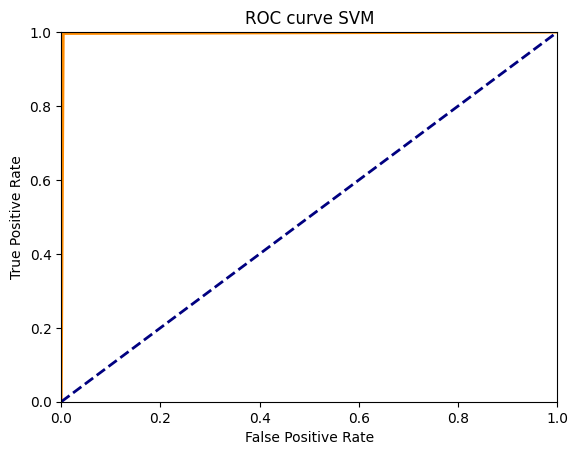

<Figure size 640x480 with 0 Axes>

Confusion Matrix 
[[491   2]
 [  2 524]]
Accuracy  0.9960745829244357
Recall  [0.9959432  0.99619772]
Precision  [0.9959432  0.99619772]
f1-score  [0.9959432  0.99619772]
AUC  0.9960704617496663
Specificity  0.9961977186311787
Tiempo de ejecución: 0.6404843330383301 segundos


In [27]:

start_time = time.time()
print("Resultados Datos ( segmentación y Luego filtrado SVM)")

classifier = make_pipeline(StandardScaler(), SVC(gamma='auto'))

classifier.fit(X_train, y_train)
print(classifier.score(X_test,y_test))


predict_label=classifier.predict(X_test)

# joblib.dump(classifier,'/content/drive/MyDrive/Trabajo de Grado/Estudio_ML_ECG/modelos exportados 2/modelo_SVM.pkl')

fpr, tpr, _ = roc_curve(y_test, predict_label)

plt.plot(fpr, tpr, lw=2, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve SVM')
plt.figure()
plt.show()



MC=confusion_matrix(y_test, predict_label)
# Confusion Matrix
print("Confusion Matrix ")
print(MC)
# Accuracy
print("Accuracy ",accuracy_score(y_test, predict_label))

# Recall o sensibilidad
print("Recall ",recall_score(y_test, predict_label, average=None))

# Precision
print("Precision ",precision_score(y_test, predict_label, average=None))

print("f1-score ", f1_score(y_test, predict_label, average=None))

print("AUC ",roc_auc_score(y_test, predict_label))

#Specificity
SP=(MC[1][1])/((MC[1][1])+(MC[0][1]))

print("Specificity ",SP)

end_time = time.time()
execution_time = end_time - start_time

print("Tiempo de ejecución:", execution_time, "segundos")

# Kernel functions

In [28]:
'''
Universidad Internacional de la RIOJA
Autor: Héctor Andrés Mora Paz (2019)
Autor: Héctor Andrés Mora Paz (2023) V.2.0
License: GPL
This file have the Kernel Artificial Neural
Network (ANN) to clasification and regresion implementation.
'''
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.kernel_approximation import Nystroem
#Clasificator
class KANNC(MLPClassifier):

    def __init__(self, hidden_layer_sizes=(100,), activation="identity",
                 solver='adam', alpha=0.0001,
                 batch_size='auto', learning_rate="constant",
                 learning_rate_init=0.001, power_t=0.5, max_iter=200,
                 shuffle=True, random_state=None, tol=1e-4,
                 verbose=False, warm_start=False, momentum=0.9,
                 nesterovs_momentum=True, early_stopping=True,
                 validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
                 epsilon=1e-8, n_iter_no_change=10, max_fun=15000,kernel='rbf', degree=2, gamma=0.1,
                     coef0=0.0):

        super().__init__(
            hidden_layer_sizes=hidden_layer_sizes,
            activation=activation, solver=solver, alpha=alpha,
            batch_size=batch_size, learning_rate=learning_rate,
            learning_rate_init=learning_rate_init, power_t=power_t,
            max_iter=max_iter, shuffle=shuffle,
            random_state=random_state, tol=tol, verbose=verbose,
            warm_start=warm_start, momentum=momentum,
            nesterovs_momentum=nesterovs_momentum,
            early_stopping=early_stopping,
            validation_fraction=validation_fraction,
            beta_1=beta_1, beta_2=beta_2, epsilon=epsilon,
            n_iter_no_change=n_iter_no_change)


        self.kernel=kernel
        self.gamma=gamma
        self.degree=degree
        self.coef0=coef0


    def fit(self, X, y):
        self.feature_map_nystroem=None
        self.isfit=False
        if(self.kernel=="linear"):
            super().fit(X,y)
            return self
        else:

            if(self.kernel=="poly"):
                self.feature_map_nystroem = Nystroem(kernel=c_polynomial_kernel(degree=self.degree, gamma=self.gamma))

            if(self.kernel=="rbf"):
                self.feature_map_nystroem = Nystroem(kernel=c_mrbf_kernel(degree=self.degree, gamma=self.gamma))
            if(self.kernel=="hyperbolic"):
                self.feature_map_nystroem = Nystroem(kernel=c_hyperbolic_kernel(gamma=self.gamma,coef0=self.coef0))
            if(self.kernel=="triangle"):
                self.feature_map_nystroem = Nystroem(kernel=c_triangle_kernel(gamma=self.gamma))
            if(self.kernel=="radial_basic"):
                self.feature_map_nystroem = Nystroem(kernel=c_radial_basic_kernel(degree=self.degree, gamma=self.gamma))
            if(self.kernel=="rquadratic"):
                self.feature_map_nystroem = Nystroem(kernel=c_rquadratic_kernel(degree=self.degree, gamma=self.gamma))
            if(self.kernel=="can"):
                self.feature_map_nystroem = Nystroem(kernel=c_canberra_kernel(gamma=self.gamma))
            if(self.kernel=="tru"):
                self.feature_map_nystroem = Nystroem(kernel=c_truncated_kernel(gamma=self.gamma))
            if(self.kernel=="chisq"):
                self.feature_map_nystroem = Nystroem(kernel=c_chi_squared_kernel(gamma=self.gamma))
            if(self.kernel=="chi2"):
                self.feature_map_nystroem = Nystroem(kernel=c_chi_squared_kernel(gamma=self.gamma))
            if(self.kernel=="laplacian"):
                self.feature_map_nystroem = Nystroem(kernel=c_laplacian_kernel(gamma=self.gamma))
            if(self.kernel=="sigmoid"):
                self.feature_map_nystroem = Nystroem(kernel=c_sigmoid_kernel(gamma=self.gamma))
            if(self.kernel=="cosine"):
                self.feature_map_nystroem = Nystroem(kernel=c_cosine_kernel())



            if not self.feature_map_nystroem is None:
                data_transformed = self.feature_map_nystroem.fit_transform(X)
                super().fit(data_transformed,y)
                self.isfit=True
                return self

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    def predict(self, X):
        if self.isfit:
            X=self.mtransform(X)
        return super().predict(X)
    def mtransform(self,X):
        if not self.feature_map_nystroem is None and self.isfit:
            return self.feature_map_nystroem.transform(X)
        return X

#Regresor
class KANNR(MLPRegressor):

    def __init__(self, hidden_layer_sizes=(100,), activation="identity",
                 solver='adam', alpha=0.0001,
                 batch_size='auto', learning_rate="constant",
                 learning_rate_init=0.001,
                 power_t=0.5, max_iter=200, shuffle=True,
                 random_state=None, tol=1e-4,
                 verbose=False, warm_start=False, momentum=0.9,
                 nesterovs_momentum=True, early_stopping=False,
                 validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
                 epsilon=1e-8, n_iter_no_change=10, max_fun=15000,kernel='rbf', degree=2, gamma=0.1,
                     coef0=0.0):
        super().__init__(
            hidden_layer_sizes=hidden_layer_sizes,
            activation=activation, solver=solver, alpha=alpha,
            batch_size=batch_size, learning_rate=learning_rate,
            learning_rate_init=learning_rate_init, power_t=power_t,
            max_iter=max_iter, shuffle=shuffle,
            random_state=random_state, tol=tol, verbose=verbose,
            warm_start=warm_start, momentum=momentum,
            nesterovs_momentum=nesterovs_momentum,
            early_stopping=early_stopping,
            validation_fraction=validation_fraction,
            beta_1=beta_1, beta_2=beta_2, epsilon=epsilon,
            n_iter_no_change=n_iter_no_change)


        self.kernel=kernel
        self.gamma=gamma
        self.degree=degree
        self.coef0=coef0


    def fit(self, X, y):
        self.feature_map_nystroem=None
        self.isfit=False
        if(self.kernel=="linear"):
            super().fit(X,y)
            return self
        else:

            if(self.kernel=="poly"):
                self.feature_map_nystroem = Nystroem(kernel=c_polynomial_kernel(degree=self.degree, gamma=self.gamma))

            if(self.kernel=="rbf"):
                self.feature_map_nystroem = Nystroem(kernel=c_mrbf_kernel(degree=self.degree, gamma=self.gamma))
            if(self.kernel=="hyperbolic"):
                self.feature_map_nystroem = Nystroem(kernel=c_hyperbolic_kernel(gamma=self.gamma,coef0=self.coef0))
            if(self.kernel=="triangle"):
                self.feature_map_nystroem = Nystroem(kernel=c_triangle_kernel(gamma=self.gamma))
            if(self.kernel=="radial_basic"):
                self.feature_map_nystroem = Nystroem(kernel=c_radial_basic_kernel(degree=self.degree, gamma=self.gamma))
            if(self.kernel=="rquadratic"):
                self.feature_map_nystroem = Nystroem(kernel=c_rquadratic_kernel(degree=self.degree, gamma=self.gamma))
            if(self.kernel=="can"):
                self.feature_map_nystroem = Nystroem(kernel=c_canberra_kernel(gamma=self.gamma))
            if(self.kernel=="tru"):
                self.feature_map_nystroem = Nystroem(kernel=c_truncated_kernel(gamma=self.gamma))
            if(self.kernel=="chisq"):
                self.feature_map_nystroem = Nystroem(kernel=c_chi_squared_kernel(gamma=self.gamma))
            if(self.kernel=="chi2"):
                self.feature_map_nystroem = Nystroem(kernel=c_chi_squared_kernel(gamma=self.gamma))
            if(self.kernel=="laplacian"):
                self.feature_map_nystroem = Nystroem(kernel=c_laplacian_kernel(gamma=self.gamma))
            if(self.kernel=="sigmoid"):
                self.feature_map_nystroem = Nystroem(kernel=c_sigmoid_kernel(gamma=self.gamma))
            if(self.kernel=="cosine"):
                self.feature_map_nystroem = Nystroem(kernel=c_cosine_kernel())



            if not self.feature_map_nystroem is None:
                data_transformed = self.feature_map_nystroem.fit_transform(X)
                super().fit(data_transformed,y)
                self.isfit=True
                return self

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    def predict(self, X):
        if self.isfit:
            X=self.mtransform(X)
        return super().predict(X)
    def mtransform(self,X):
        if not self.feature_map_nystroem is None and self.isfit:
            X=self.feature_map_nystroem.transform(X)
            return X
        return X

In [29]:
'''
Universidad Internacional de la RIOJA
Autor: Héctor Andrés Mora Paz (2019)
Autor: Héctor Andrés Mora Paz (2023) V.2.0
License: GPL
This file have the  Kernel Support Vector Machine (SVM)
to clasification and regresion implementation.
'''
#from .KernelUtilities import *
from sklearn.svm import SVC,SVR
from sklearn.model_selection import train_test_split
#Clasificator
class KSVC(SVC):

    def __init__(self, C=1.0, kernel='rbf', degree=2, gamma='auto_deprecated',
                 coef0=0.0, shrinking=True, probability=False,
                 tol=1e-3, cache_size=200, class_weight=None,
                 verbose=False, max_iter=-1, decision_function_shape='ovr',
                 random_state=None,a=2):

        super().__init__(
        kernel=kernel, degree=degree, gamma=gamma,
        coef0=coef0, tol=tol, C=C, shrinking=shrinking,
        probability=probability, cache_size=cache_size,
        class_weight=class_weight, verbose=verbose, max_iter=max_iter,
        decision_function_shape=decision_function_shape,
        random_state=random_state)

        self.a=a

    def fit(self, X, y, sample_weight=None):

        if(self.kernel=="linear" or self.kernel== "poly" or self.kernel== "rbf"):
            super().fit(X,y)
            return self
        else:
            if(self.kernel=="mrbf"):
                self.kernel=mrbf_kernel(degree=self.degree, gamma=self.gamma)
                super().fit(X,y)
                return self
            if(self.kernel=="hyperbolic"):
                self.kernel=hyperbolic_kernel(self.gamma,self.coef0)
                super().fit(X,y)
                return self
            if(self.kernel=="triangle"):
                self.kernel=triangle_kernel(self.gamma)
                super().fit(X,y)
                return self
            if(self.kernel=="radial_basic"):
                self.kernel=radial_basic_kernel(self.degree, self.gamma)
                super().fit(X,y)
                return self
            if(self.kernel=="rquadratic"):
                self.kernel=rquadratic_kernel(self.degree, self.gamma, self.coef0)
                super().fit(X,y)
                return self
            if(self.kernel=="can"):
                self.kernel=canberra_kernel(self.gamma)
                super().fit(X,y)
                return self
            if(self.kernel=="tru"):
                self.kernel=truncated_kernel(self.gamma)
                super().fit(X,y)
                return self
            if(self.kernel=="chisq"):
                self.kernel=additive_chi2_kernel
                super().fit(X,y)
                return self
            if(self.kernel=="chi2"):
                self.kernel=chi2_kernel
                super().fit(X,y)
                return self
            if(self.kernel=="laplacian"):
                self.kernel=laplacian_kernel
                super().fit(X,y)
                return self
            if(self.kernel=="sigmoid"):
                self.kernel=sigmoid_kernel
                super().fit(X,y)
                return self
            if(self.kernel=="cosine"):
                self.kernel=cosine_similarity
                super().fit(X,y)
                return self


    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
#Regressor
class KSVR(SVR):

    def __init__(self, kernel='rbf', degree=2, gamma='scale',
                 coef0=0.0, tol=1e-3, C=1.0, epsilon=0.1, shrinking=True,
                 cache_size=200, verbose=False, max_iter=-1):

        super().__init__(
            kernel=kernel, degree=degree, gamma=gamma,
            coef0=coef0, tol=tol, C=C, epsilon=epsilon, verbose=verbose,
            shrinking=shrinking, cache_size=cache_size,
            max_iter=max_iter)

    def fit(self, X, y, sample_weight=None):

        if(self.kernel=="linear" or self.kernel== "poly" or self.kernel== "rbf"):
            super().fit(X,y)
            return self
        else:
            if(self.kernel=="mrbf"):
                self.kernel=mrbf_kernel(degree=self.degree, gamma=self.gamma)
                super().fit(X,y)
                return self
            if(self.kernel=="hyperbolic"):
                self.kernel=hyperbolic_kernel(self.gamma,self.coef0)
                super().fit(X,y)
                return self
            if(self.kernel=="triangle"):
                self.kernel=triangle_kernel(self.gamma)
                super().fit(X,y)
                return self
            if(self.kernel=="radial_basic"):
                self.kernel=radial_basic_kernel(self.degree, self.gamma)
                super().fit(X,y)
                return self
            if(self.kernel=="rquadratic"):
                self.kernel=rquadratic_kernel(self.degree, self.gamma, self.coef0)
                super().fit(X,y)
                return self
            if(self.kernel=="can"):
                self.kernel=canberra_kernel(self.gamma)
                super().fit(X,y)
                return self
            if(self.kernel=="tru"):
                self.kernel=truncated_kernel(self.gamma)
                super().fit(X,y)
                return self
            if(self.kernel=="chisq"):
                self.kernel=additive_chi2_kernel
                super().fit(X,y)
                return self
            if(self.kernel=="chi2"):
                self.kernel=chi2_kernel
                super().fit(X,y)
                return self
            if(self.kernel=="laplacian"):
                self.kernel=laplacian_kernel
                super().fit(X,y)
                return self
            if(self.kernel=="sigmoid"):
                self.kernel=sigmoid_kernel
                super().fit(X,y)
                return self
            if(self.kernel=="cosine"):
                self.kernel=cosine_similarity
                super().fit(X,y)
                return self

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

In [30]:
'''
Universidad Internacional de la RIOJA
Autor: Héctor Andrés Mora Paz (2019) V.1.0
Autor: Héctor Andrés Mora Paz (2023) V.2.0
License: GPL
This file have at Belanche Kernel functions implementation and kernel propouse
'''
import numpy as np
import numpy.linalg as la
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.metrics.pairwise import chi2_kernel,additive_chi2_kernel,laplacian_kernel,sigmoid_kernel,cosine_similarity
#Kernel functions definitions are at Belanche kernel Design paper
np.seterr(divide='ignore', invalid='ignore')

#POLYNOMIAL KERNEL m E N, a>0
def polynomial(x,y, degree=3, gamma=0.01,coef0=0.0):
    m=degree
    a=gamma
    return (a*np.dot(x,y)+1)**m
#RBF gamma>0, beta E (0,2]
def mrbf(x,y, degree=3, gamma=0.01,coef0=0.0):
    beta=degree
    sm=np.sum(gamma*(x-y)**beta)
    return np.exp(-sm)

#Hyperbolic tangent kernel a0>0, b<0
def hyperbolic(x,y, degree=3, gamma=0.01,coef0=0.0):
    b=coef0
    a=gamma
    return np.tanh(a*np.dot(x,y)+b)

#Triangle a>0
def triangle(x,y, degree=3, gamma=0.01,coef0=0.0):
    a=gamma
    norm=la.norm(np.subtract(x, y))
    if norm<=a:
        return 1-norm/a
    return 0

#ANOVA gamma>0, m E N
def radial_basic(x, y, degree=3, gamma=0.01,coef0=0.0):
    m=degree
    sm=0
    sm=np.sum(np.exp(-gamma*((x-y)**2)))
    return sm**m
#Rational quadratic a>0
def rquadratic(x,y, degree=3, gamma=0.01,coef0=0.1):
    a=coef0
    norm=la.norm(np.subtract(x, y))
    return 1-(norm**2)/(norm**2+a)
#Canberra gamma E (0,1]
def canberra(x,y, degree=3, gamma=0.01,coef0=0.0):
    sm=0
    d=x.shape[0]
    r=gamma*np.abs(x-y)/(np.abs(x)+np.abs(y))
    sm=np.sum(r[~np.isnan(r)])

    return 1-sm/d
#Truncated gamma>0
def truncated(x,y, degree=3, gamma=0.01,coef0=0.0):
    sm=0
    d=x.shape[0]
    val=1-np.abs(x-y)/gamma
    sm=np.sum(val[val>0])
    return sm/d

# Additive Chi Squared Kernel
def chi_squared(x,y, degree=3, gamma=0.01,coef0=0.0):
    #print('x',x,'y',y)
    sm=0
    num=(x-y)**2
    den=x+y
    sm=np.sum(num/den)
    if np.isnan(sm) or np.isinf(sm):
      sm=0

    return -sm
# chi2_kernel

def chi2(x,y, degree=3, gamma=0.01,coef0=0.0):
    #print('x',x,'y',y)
    sm=0
    num=(x-y)**2
    den=x+y
    sm=np.sum(num/den)
    if np.isnan(sm) or np.isinf(sm):
      sm=0

    return np.exp(-gamma*sm)

# laplacian kernel
# chi2_kernel
def laplacian(x,y, degree=3, gamma=0.01,coef0=0.0):
    #print('x',x,'y',y)
    sm=np.abs(x-y).sum()
    return np.exp(-gamma*sm)
# sigmoid
def sigmoid(x,y, degree=3, gamma=0.01,coef0=0.0):
    #print('x',x,'y',y)
    sm=np.tanh(gamma*x@y+coef0)

    return sm
# cosine
def cosine(x,y, degree=3, gamma=0.01,coef0=0.0):
    #print('x',x,'y',y)
    sm=(x@y)/(np.linalg.norm(x)*np.linalg.norm(y))
    if np.isnan(sm) or np.isinf(sm):
      sm=0
    return sm
#Gram Matrix
def proxy_kernel(X, Y,K, degree=3, gamma=0.01,coef0=0.0):
    if K is None:
        K=mrbf

    gram_matrix = np.zeros((X.shape[0], Y.shape[0]))
    for i, x in enumerate(X):
        for j, y in enumerate(Y):
            gram_matrix[i, j] = K(x,y, degree, gamma,coef0)
    return gram_matrix
#POLYNOMIAL
#degree=3, gamma=0.01,coef0=0.0
#------------------------------------
#Gram matrix Kernel
#POLYNOMIAL
#degree=3, gamma=0.01,coef0=0.0
def polynomial_kernel(degree, gamma):
    def pk(X,Y):
        return proxy_kernel(X,Y,K=polynomial,degree=degree,gamma=gamma)
    return pk
#MRBF
def mrbf_kernel(degree=2, gamma=0.01):
    def mrbfk(X,Y):
        return proxy_kernel(X,Y,K=mrbf,degree=degree,gamma=gamma)
    return mrbfk
#HIPERBOLIC TAN
def hyperbolic_kernel(gamma,coef0):
    def hk(X,Y):
        return proxy_kernel(X,Y,K=hyperbolic,gamma=gamma,coef0=coef0)
    return hk
#TRIANGLE
def triangle_kernel(gamma):
    def tk(X,Y):
        return proxy_kernel(X,Y,K=triangle,gamma=gamma)
    return tk
#ANOVA
def radial_basic_kernel(degree, gamma):
    def rbk(X,Y):
        return proxy_kernel(X,Y,K=radial_basic,degree=degree,gamma=gamma)
    return rbk
#RATIONAL QUADRATIC
def rquadratic_kernel(degree, gamma,coef0):
    def rqk(X,Y):
        return proxy_kernel(X,Y,K=rquadratic,degree=degree,gamma=gamma,coef0=coef0)
    return rqk
#CANBERRA
def canberra_kernel(gamma):
    def ck(X,Y):
        return proxy_kernel(X,Y,K=canberra,gamma=gamma)
    return ck
#TRUNCATED
def truncated_kernel(gamma):
    def trk(X,Y):
        return proxy_kernel(X,Y,K=truncated,gamma=gamma)
    return trk

#---------------------------------------
#Callable Functions
def c_polynomial_kernel(degree, gamma):
    def pk(X,Y):
        return polynomial(X,Y, degree=degree, gamma=gamma)
    return pk
#MRBF
def c_mrbf_kernel(degree=2, gamma=0.01):
    def mrbfk(X,Y):
        return mrbf(X,Y,degree=degree,gamma=gamma)
    return mrbfk
#HIPERBOLIC TAN
def c_hyperbolic_kernel(gamma,coef0):
    def hk(X,Y):
        return hyperbolic(X,Y,gamma=0.01,coef0=0.0)
    return hk
#TRIANGLE
def c_triangle_kernel(gamma):
    def tk(X,Y):
        return triangle(X,Y,gamma=gamma)
    return tk
#ANOVA
def c_radial_basic_kernel(degree, gamma):
    def rbk(X,Y):
        return radial_basic(X,Y, degree=degree, gamma=gamma)
    return rbk
#RATIONAL QUADRATIC
def c_rquadratic_kernel(degree, gamma):
    def rqk(X,Y):
        return rquadratic(X,Y, degree=degree, gamma=gamma)
    return rqk
#CANBERRA
def c_canberra_kernel(gamma):
    def ck(X,Y):
        return canberra(X,Y,gamma=gamma)
    return ck
#TRUNCATED
def c_truncated_kernel(gamma):
    def trk(X,Y):
        return truncated(X,Y,gamma=gamma)
    return trk
#CHI SQUARED
def c_chi_squared_kernel(gamma):
    def csq(X,Y):
        return chi_squared(X,Y,gamma=gamma)
    return csq
#CHI2
def c_chi2_kernel(gamma):
    def c2(X,Y):
        return chi2(X,Y,gamma=gamma)
    return c2
#LAPLACIAN
def c_laplacian_kernel(gamma):
    def lpl(X,Y):
        return laplacian(X,Y,gamma=gamma)
    return lpl
#SIGMOID
def c_sigmoid_kernel(gamma):
    def sigm(X,Y):
        return sigmoid(X,Y,gamma=gamma)
    return sigm

#COSINE
def c_cosine_kernel():
    def cos(X,Y):
        return cosine(X,Y)
    return cos

# Kernel comparision

In [31]:
X.shape

(4395, 591)

In [32]:

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [33]:
kernels = ['tru', 'can', 'radial_basic','triangle','hyperbolic','laplacian','sigmoid','cosine']
results = {}
y_preds_by_kernel = {}

for kernel in kernels:
    print(f"\nEntrenando SVM con kernel: {kernel}")
    model = make_pipeline(StandardScaler(), KSVC(kernel=kernel, class_weight='balanced', gamma=10, C=100,coef0=0.0))
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_preds_by_kernel[kernel] = y_pred
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results[kernel] = {
        'accuracy': accuracy,
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1-score': report['weighted avg']['f1-score']
    }

print("\nResultados comparativos:")
for kernel, metrics in results.items():
    print(f"Kernel: {kernel}")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  Precision: {metrics['precision']:.4f}")
    print(f"  Recall: {metrics['recall']:.4f}")
    print(f"  F1-Score: {metrics['f1-score']:.4f}\n")

best_kernel = max(results, key=lambda k: results[k]['f1-score'])
print(f"El mejor kernel es '{best_kernel}' con {results[best_kernel]['accuracy']:.4f}.")






Entrenando SVM con kernel: tru

Entrenando SVM con kernel: can

Entrenando SVM con kernel: radial_basic

Entrenando SVM con kernel: triangle

Entrenando SVM con kernel: hyperbolic

Entrenando SVM con kernel: laplacian

Entrenando SVM con kernel: sigmoid

Entrenando SVM con kernel: cosine

Resultados comparativos:
Kernel: tru
  Accuracy: 0.9961
  Precision: 0.9961
  Recall: 0.9961
  F1-Score: 0.9961

Kernel: can
  Accuracy: 0.9961
  Precision: 0.9961
  Recall: 0.9961
  F1-Score: 0.9961

Kernel: radial_basic
  Accuracy: 0.9882
  Precision: 0.9882
  Recall: 0.9882
  F1-Score: 0.9882

Kernel: triangle
  Accuracy: 0.9902
  Precision: 0.9902
  Recall: 0.9902
  F1-Score: 0.9902

Kernel: hyperbolic
  Accuracy: 0.9539
  Precision: 0.9539
  Recall: 0.9539
  F1-Score: 0.9539

Kernel: laplacian
  Accuracy: 0.9961
  Precision: 0.9961
  Recall: 0.9961
  F1-Score: 0.9961

Kernel: sigmoid
  Accuracy: 0.9058
  Precision: 0.9058
  Recall: 0.9058
  F1-Score: 0.9058

Kernel: cosine
  Accuracy: 0.9951
  P

In [39]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

model = make_pipeline(StandardScaler(), KSVC(kernel='tru', class_weight='balanced', gamma=10, C=100,coef0=0.0,probability=True))
model.fit(X_train, y_train)

#clasification report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       493
         1.0       1.00      0.99      1.00       526

    accuracy                           1.00      1019
   macro avg       1.00      1.00      1.00      1019
weighted avg       1.00      1.00      1.00      1019



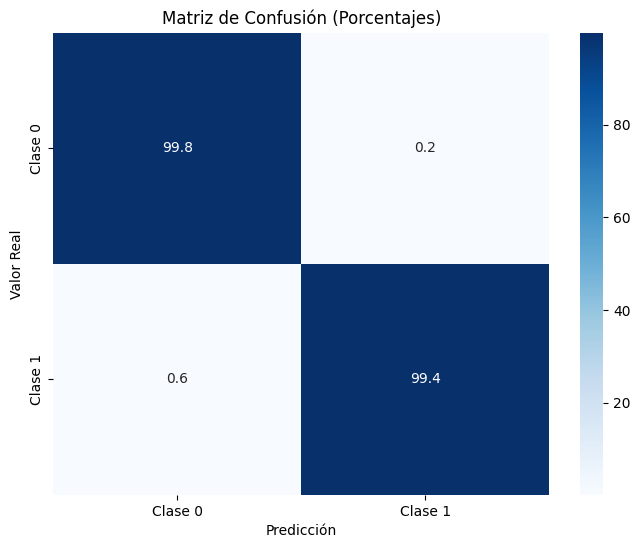

In [40]:
# prompt: graficar la matriz de confución en porcentajes

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt=".1f", cmap="Blues",
            xticklabels=['Clase 0', 'Clase 1'],
            yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión (Porcentajes)')
plt.show()


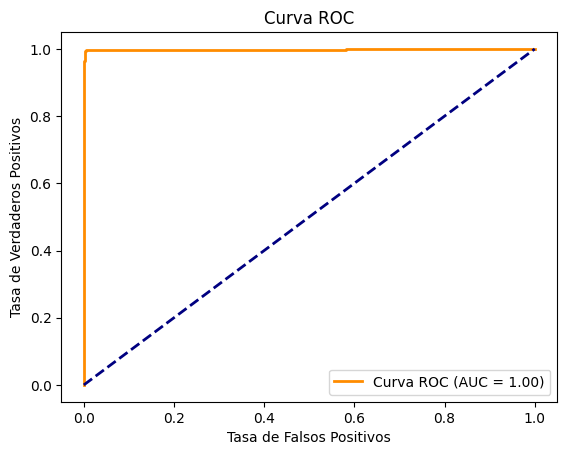

In [41]:
# prompt: Graficar la curva roc con su AUC

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have y_test and y_pred_proba (predicted probabilities)
# If you don't have probabilities, you can use model.predict_proba(X_test)

y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


# Best Kernels

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
rbf=Pipeline([('sscaler', StandardScaler()), ('svc', SVC(kernel='rbf', class_weight='balanced', gamma=3792.690190732246, C=27825.59402207126))])
rbf.fit(X_train,y_train)
rbf.score(X_test,y_test)

In [ ]:
tru=Pipeline([('sscaler', StandardScaler()), ('svc', KSVC(kernel='tru', class_weight='balanced', gamma=0.0001, C=46.4158883361278))])
tru.fit(X_train,y_train)
tru.score(X_test,y_test)

In [ ]:
can=Pipeline([('sscaler', StandardScaler()), ('svc', KSVC(kernel='can', class_weight='balanced', gamma=10000.0, C=46.4158883361278))])
can.fit(X_train,y_train)
can.score(X_test,y_test)

In [ ]:
hyp=Pipeline([('sscaler', StandardScaler()), ('svc', KSVC(kernel='hyperbolic', class_weight='balanced', gamma=0.0001, C=7742.636826811277))])
hyp.fit(X_train,y_train)
hyp.score(X_test,y_test)

In [ ]:
triangle2=Pipeline([('sscaler', StandardScaler()), ('svc', KSVC(kernel='triangle', class_weight='balanced', gamma=0.0001, C=46.4158883361278))])
triangle2.fit(X_train,y_train)
triangle2.score(X_test,y_test)


In [ ]:
svmradial_basic=Pipeline([('sscaler', StandardScaler()), ('svc', KSVC(kernel='radial_basic', class_weight='balanced', gamma=10000.0, C=46.4158883361278))])
svmradial_basic.fit(X_train,y_train)
svmradial_basic.score(X_test,y_test)

In [ ]:
svmlaplacian=Pipeline([('sscaler', StandardScaler()), ('svc', KSVC(kernel='laplacian', class_weight='balanced', gamma=0.0001, C=46.4158883361278))])
svmlaplacian.fit(X_train,y_train)
svmlaplacian.score(X_test,y_test)